## Name = Ujwal Geed

# Walmart Sales Analysis

# Objectives :

## -- Sales Performance Analysis
### Monthly Sales Trend
### Yearly Sales Trend

## -- Product Analysis
### Distribution of product category
### Top Selling Category
### Top Selling Products
### Sub-category Sales Performance 
### Sales Distribution by Product Category

## -- Customer Segmentation
### Customer Segment Distribution
### Segment and Category and Sub-category
### Sales by Customer Segment

## -- Geographical Analysis
### Sales by Region
### Sales by State
### Top Cities with Highest Number Of Customers
### Region Sales by Order Date

## -- Shipping Analysis
### Shipping Modes chosen by customers
### Shipping Mode Distribution
### List Of Sales and Ship Mode 
### Sales Distribution by Region Over Time
### Distribution of sales

## -- Order Trends
### Distribution of Order Dates
### Distribution of Profits

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   int64  
 3   Ship Date      9800 non-null   int32  
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [54]:
# Postal code has missing value
mean_postal_code = df['Postal Code'].mean()
df['Postal Code'].fillna(mean_postal_code, inplace=True)

In [55]:
# drop duplicates row
df = df.drop_duplicates()

In [58]:
# Drop columns
df = df.drop(['Row ID'],axis=1)[]

In [69]:
# Convert 'Order Date' and 'Ship Date' columns to datetime with format 'DD/MM/YYYY'
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

## Sales Performance Analysis

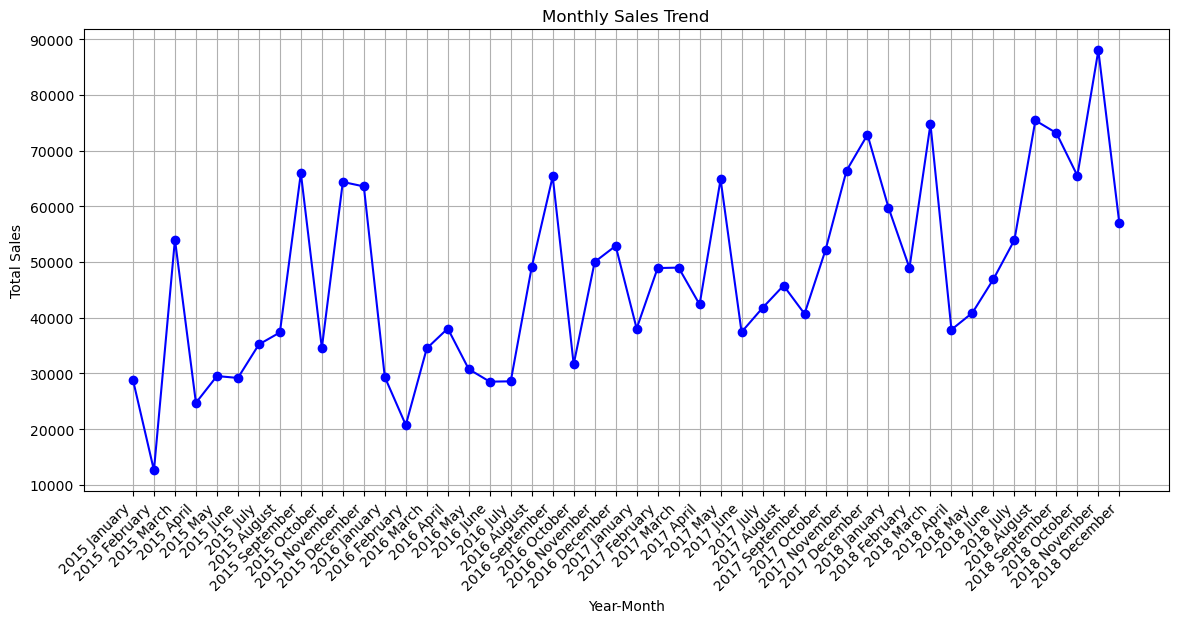

In [97]:
# Already converted the data in datetime format
# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()


# Convert 'Month' to categorical with custom order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by year and month, sum 'Sales' for each period
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plot the monthly sales trend
plt.figure(figsize=(14, 6))
month_labels = monthly_sales['Year'].astype(str) + ' ' + monthly_sales['Month'].astype(str)
plt.plot(month_labels, monthly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

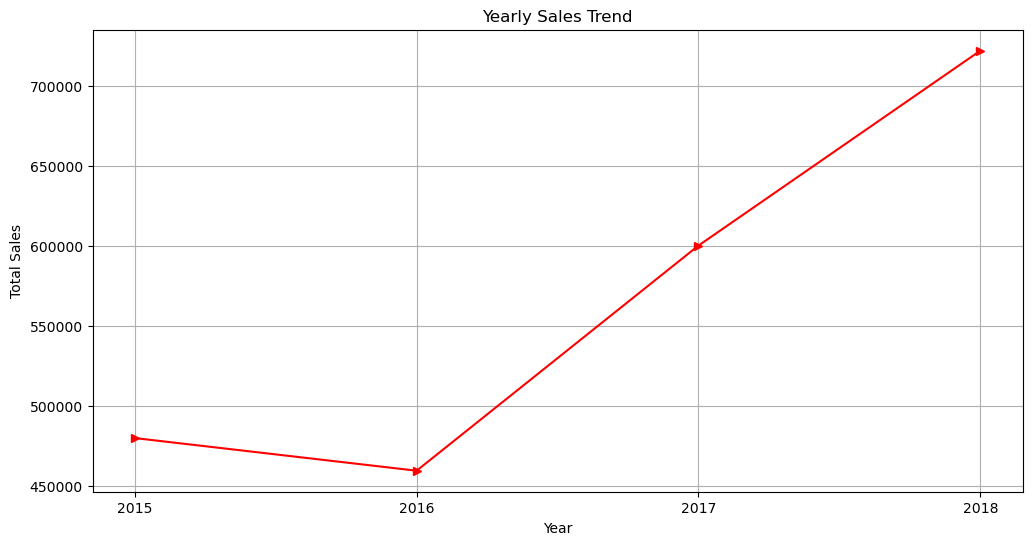

In [71]:
# Group by year, sum 'Sales' for each year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Plot the yearly sales trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='>', linestyle='-', color='r')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Set x-axis ticks to show only whole years
plt.xticks(yearly_sales['Year'])

plt.show()

## Product Analysis

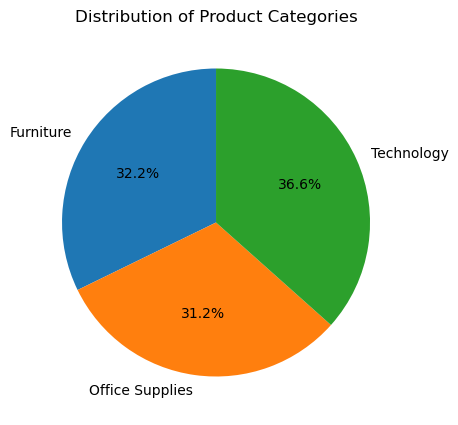

In [75]:
# Plot the distribution of product categories
plt.figure(figsize=(5, 5))
category_distribution = df.groupby('Category')['Sales'].sum()
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=90) #autopct to add per in pie
plt.title('Distribution of Product Categories')
plt.show()

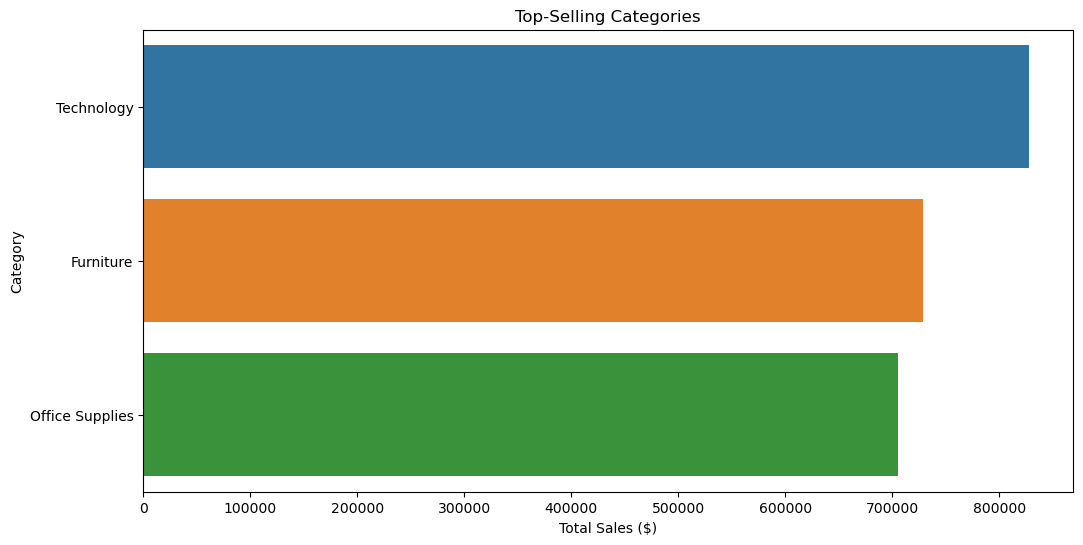

In [82]:
#Plot top-selling categories
plt.figure(figsize=(12, 6))
top_categories = df.groupby('Category')['Sales'].sum().nlargest(5)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top-Selling Categories')
plt.xlabel('Total Sales ($)')
plt.ylabel('Category')
plt.show()

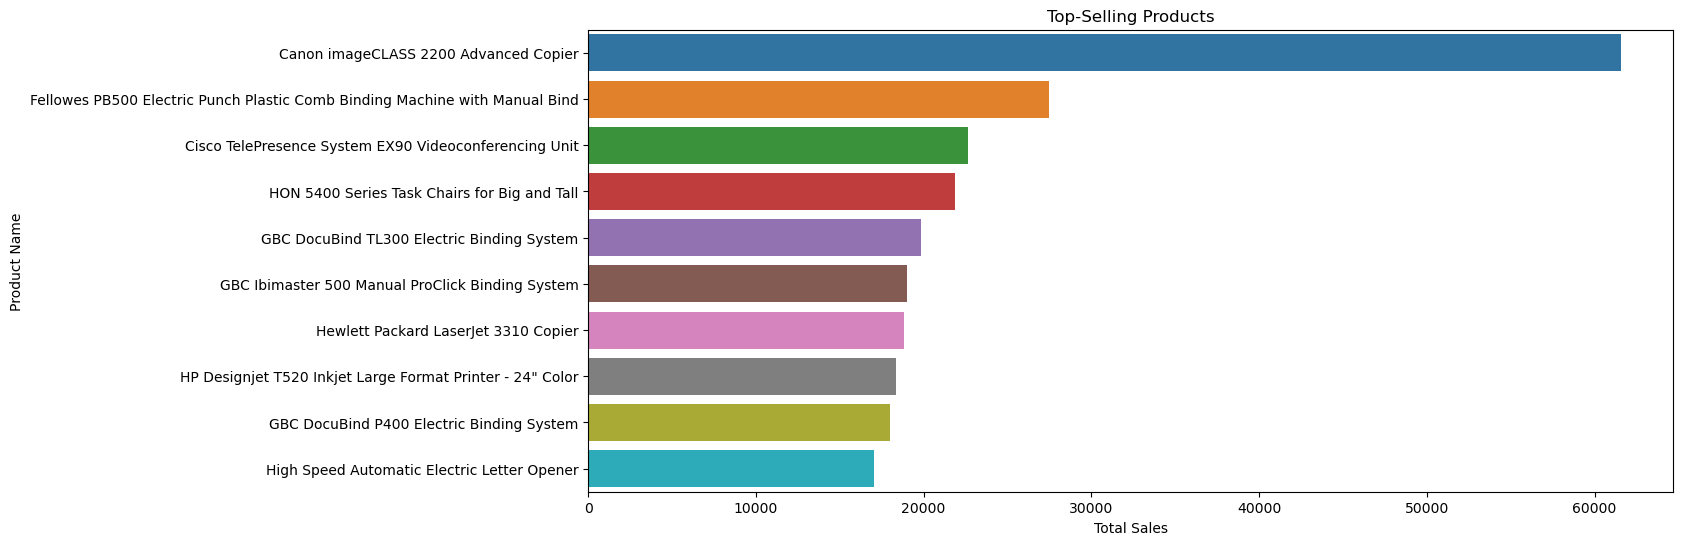

In [77]:
# Plot top-selling products
plt.figure(figsize=(14, 6))
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

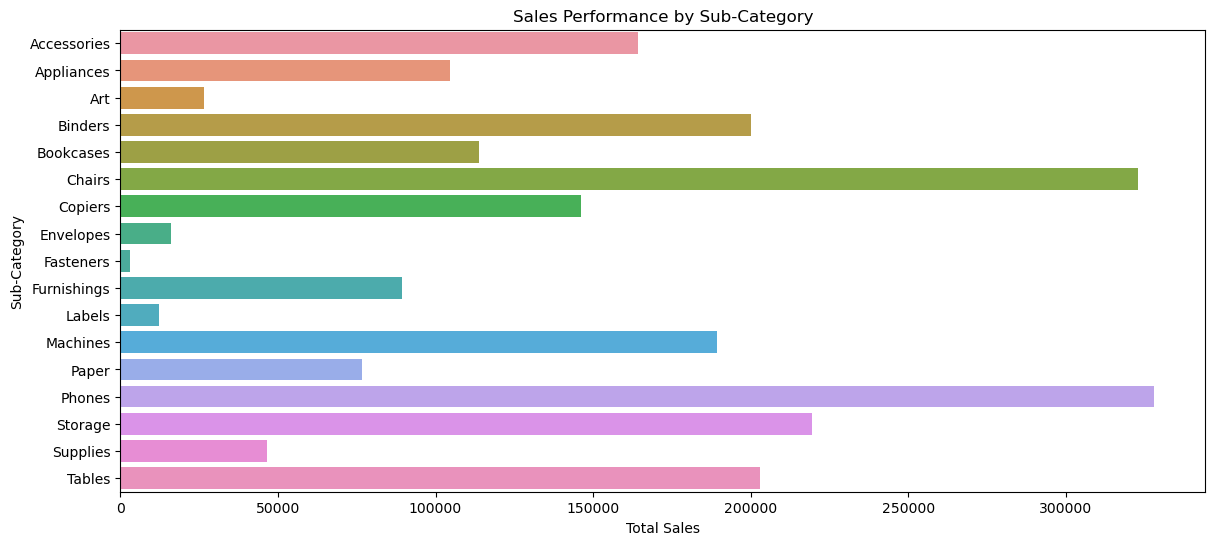

In [53]:
# Plot sales performance by sub-category
plt.figure(figsize=(14, 6))
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()
sns.barplot(x=sub_category_sales.values, y=sub_category_sales.index)
plt.title('Sales Performance by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

## Customer Segmentation

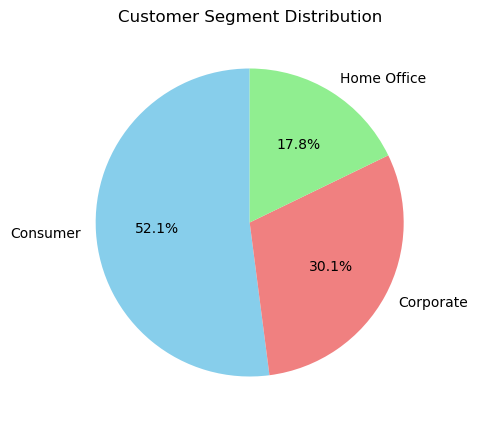

In [74]:
# Calculate the number of customers in each segment
segment_distribution = df['Segment'].value_counts()

# Plot a pie chart for segment distribution
plt.figure(figsize=(5, 5))
plt.pie(segment_distribution, labels=segment_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])

# Customize the plot
plt.title('Customer Segment Distribution')

# Display the plot
plt.show()


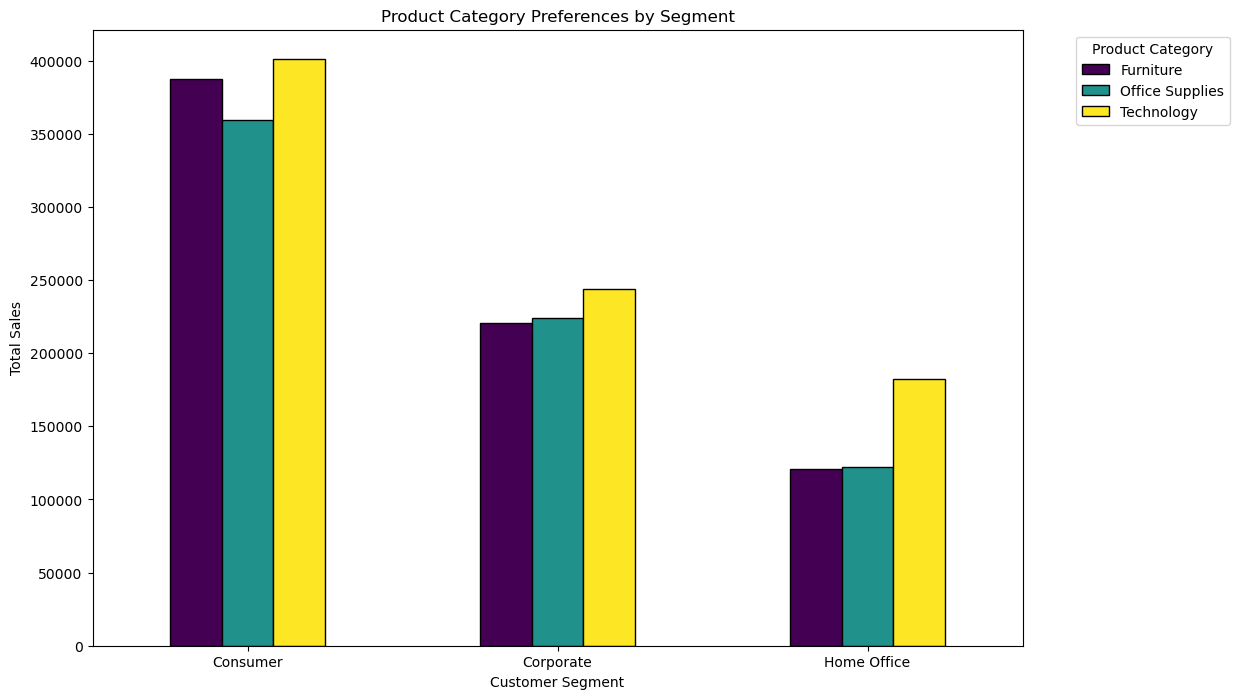

In [73]:
# Group the data by 'Segment' and 'Category' or 'Sub-Category' and calculate relevant metrics  
segment_category_preferences = df.groupby(['Segment', 'Category'])['Sales'].sum().reset_index()

# Pivot the table for better visualization
preferences_pivot = segment_category_preferences.pivot(index='Segment', columns='Category', values='Sales')

# Plot a grouped bar chart for product category preferences
preferences_pivot.plot(kind='bar', colormap='viridis', edgecolor='black', figsize=(12, 8))

# Customize the plot
plt.title('Product Category Preferences by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for better readability
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


## Geographical Analysis

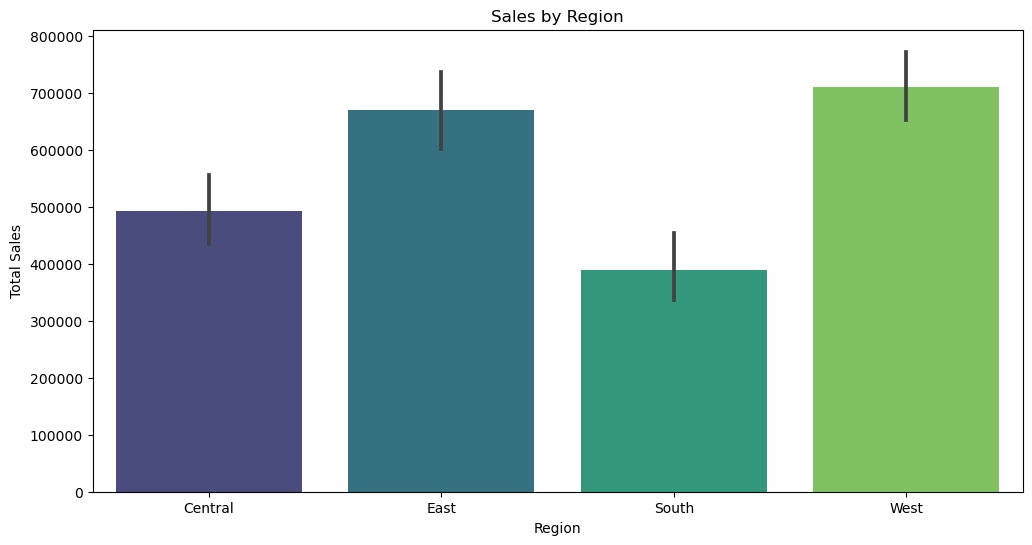

In [58]:
# Plot sales by region using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, palette='viridis')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

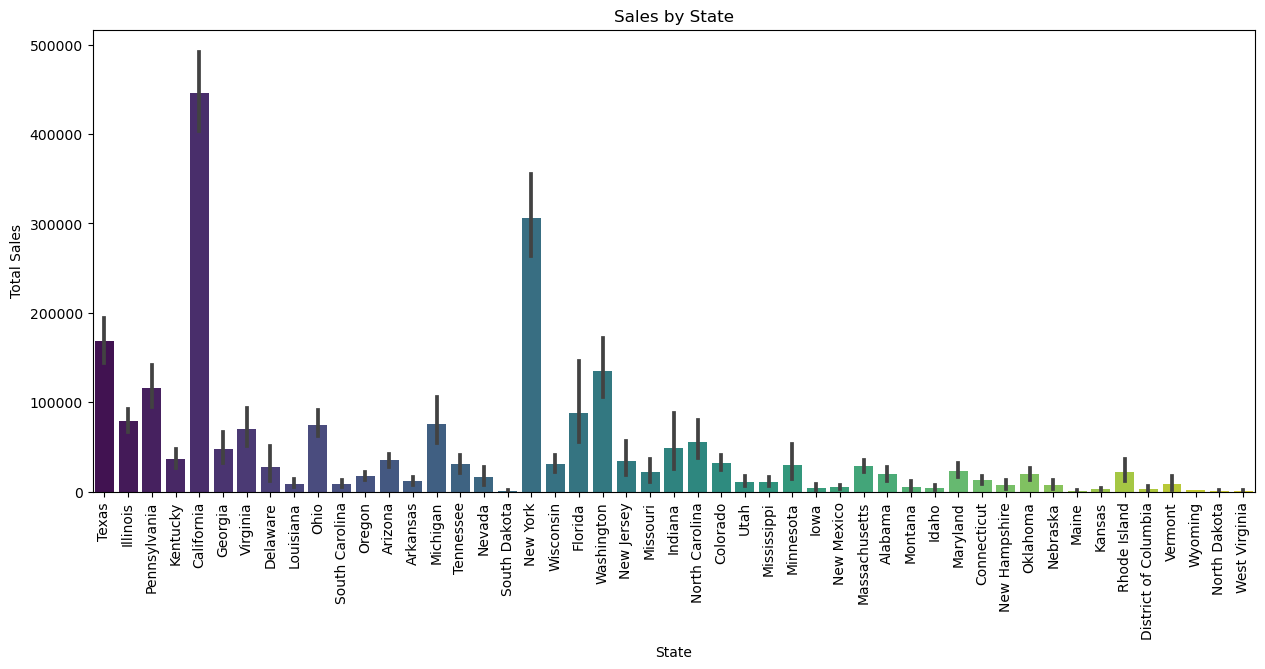

In [59]:
# Plot sales by state using a bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='State', y='Sales', data=df, estimator=sum, palette='viridis')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

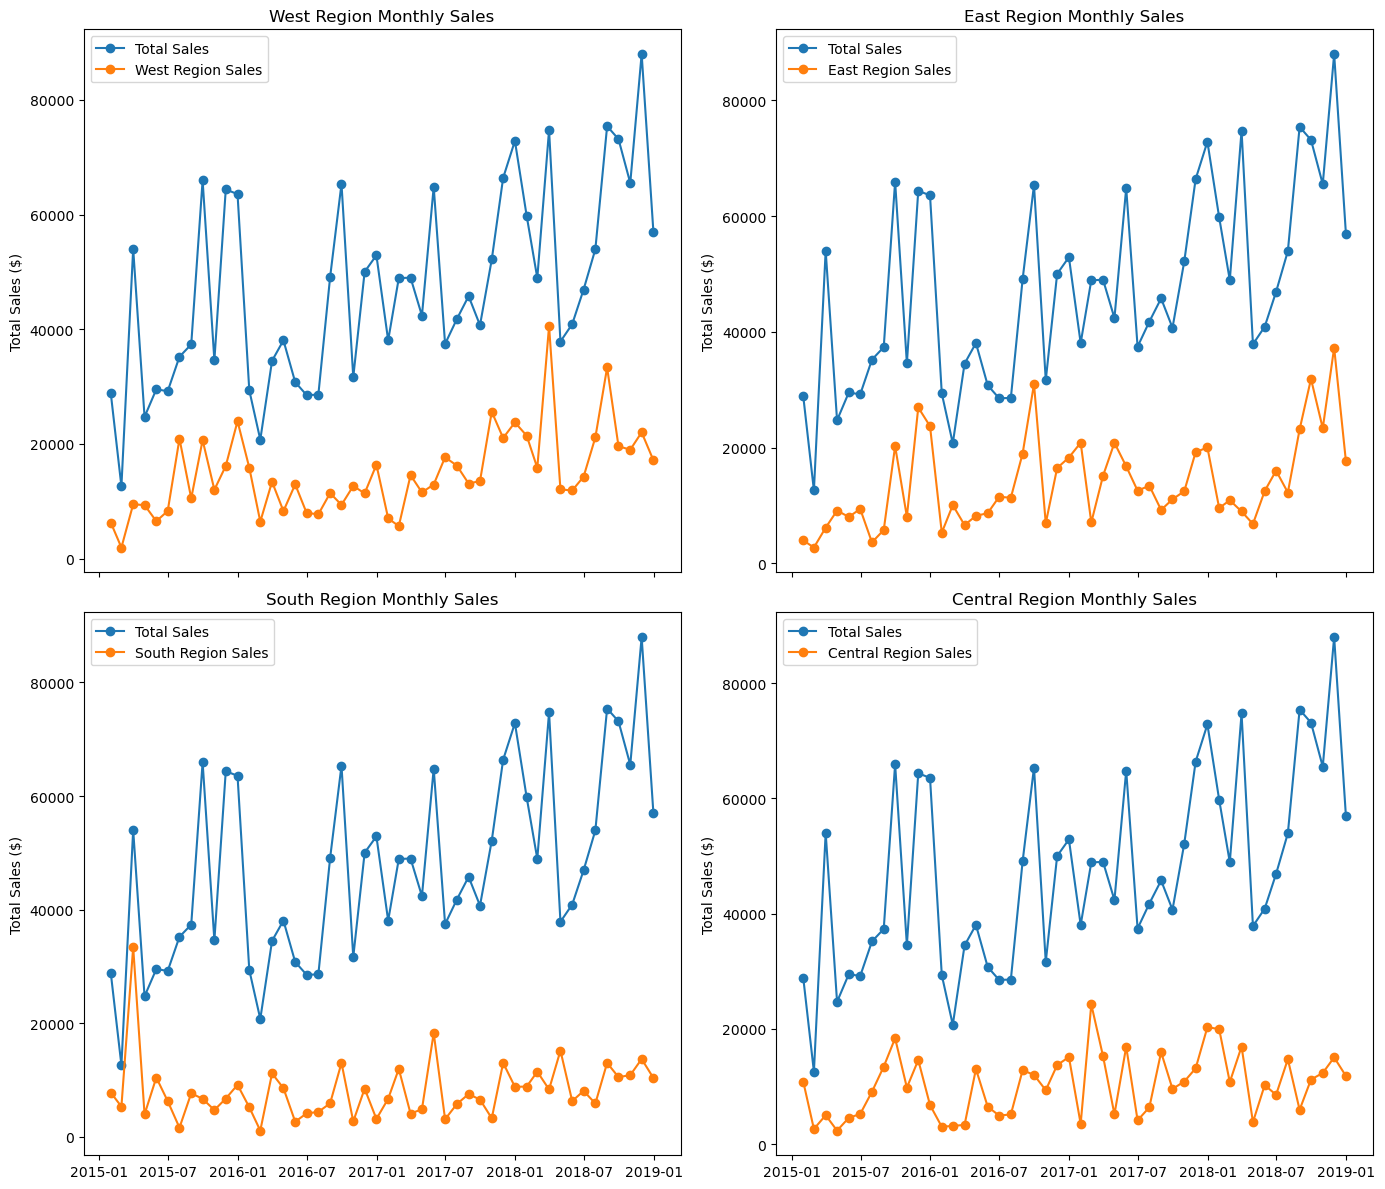

In [80]:
# Assuming 'Region', 'Order Date', and 'Sales' columns exist in df, replace with actual column names if needed
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.set_index('Order Date')['Sales'].resample('M').sum().round(2)

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), sharex=True)

regions = ['West', 'East', 'South', 'Central']

def plot_region(ax, region):
    region_df = df[df['Region'] == region]
    region_monthly_sales = region_df.set_index('Order Date')['Sales'].resample('M').sum().round(2)

    ax.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', label='Total Sales')
    ax.plot(region_monthly_sales.index, region_monthly_sales.values, marker='o', linestyle='-', label=f'{region} Region Sales')
    ax.set_title(f'{region} Region Monthly Sales')
    ax.set_ylabel('Total Sales ($)')
    ax.legend()

# Plot for West Region
plot_region(axes[0, 0], 'West')
# Plot for East Region
plot_region(axes[0, 1], 'East')
# Plot for South Region
plot_region(axes[1, 0], 'South')
# Plot for Central Region
plot_region(axes[1, 1], 'Central')
# Adjust layout for better spacing
plt.tight_layout()

plt.show()

## Shipping Analysis

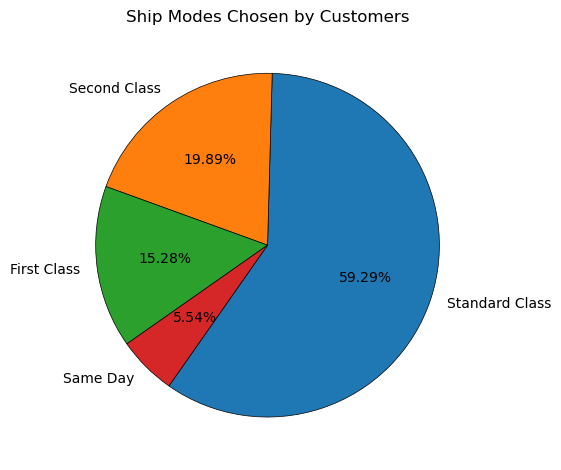

In [62]:
ship_mode_df = df.groupby('Ship Mode').sum(numeric_only=True).sort_values('Sales', ascending=False)
ship_mode_df = ship_mode_df[['Sales']]
ship_mode_df['Count'] = df['Ship Mode'].value_counts()
ship_mode_df.reset_index(inplace=True)

plt.pie(ship_mode_df['Sales'], labels=ship_mode_df['Ship Mode'], autopct='%1.2f%%',
        startangle=235, wedgeprops={'edgecolor':'black','linewidth':0.5})
plt.title('Ship Modes Chosen by Customers')
plt.tight_layout()
plt.show()

In [64]:
df.groupby('Ship Mode').mean(numeric_only=True).sort_values('Sales', ascending=False)[['Sales']]

,Sales
Ship Mode,
Second Class,236.547939
Same Day,232.749143
First Class,230.228020
Standard Class,228.849856


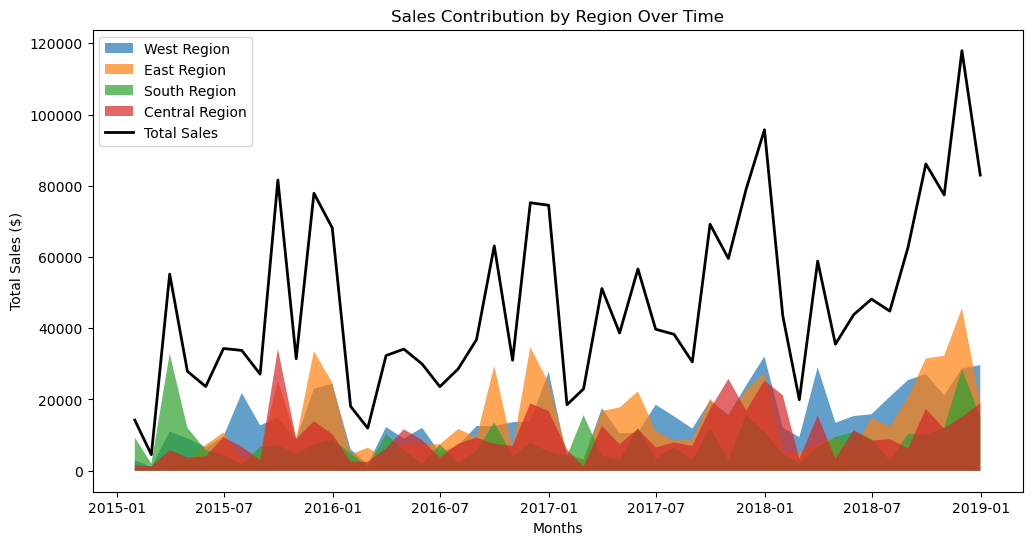

In [65]:
# Assuming 'Region', 'Order Date', and 'Sales' columns exist in df, replace with actual column names if needed
monthly_sales = df.set_index('Order Date')['Sales'].resample('M').sum().round(2)

# Create separate DataFrames for each region
west_df = df.loc[df['Region'] == 'West']
east_df = df.loc[df['Region'] == 'East']
south_df = df.loc[df['Region'] == 'South']
central_df = df.loc[df['Region'] == 'Central']

# Calculate monthly sales for each region
west_monthly_sales = west_df.set_index('Order Date')['Sales'].resample('M').sum().round(2)
east_monthly_sales = east_df.set_index('Order Date')['Sales'].resample('M').sum().round(2)
south_monthly_sales = south_df.set_index('Order Date')['Sales'].resample('M').sum().round(2)
central_monthly_sales = central_df.set_index('Order Date')['Sales'].resample('M').sum().round(2)

# Create area chart for sales contribution of different regions
plt.figure(figsize=(12, 6))

plt.fill_between(west_monthly_sales.index, 0, west_monthly_sales.values, alpha=0.7, label='West Region')
plt.fill_between(east_monthly_sales.index, 0, east_monthly_sales.values, alpha=0.7, label='East Region')
plt.fill_between(south_monthly_sales.index, 0, south_monthly_sales.values, alpha=0.7, label='South Region')
plt.fill_between(central_monthly_sales.index, 0, central_monthly_sales.values, alpha=0.7, label='Central Region')

plt.plot(monthly_sales.index, monthly_sales.values, color='black', linestyle='-', linewidth=2, label='Total Sales')

plt.title('Sales Contribution by Region Over Time')
plt.xlabel('Months')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.show()


## Order Trends

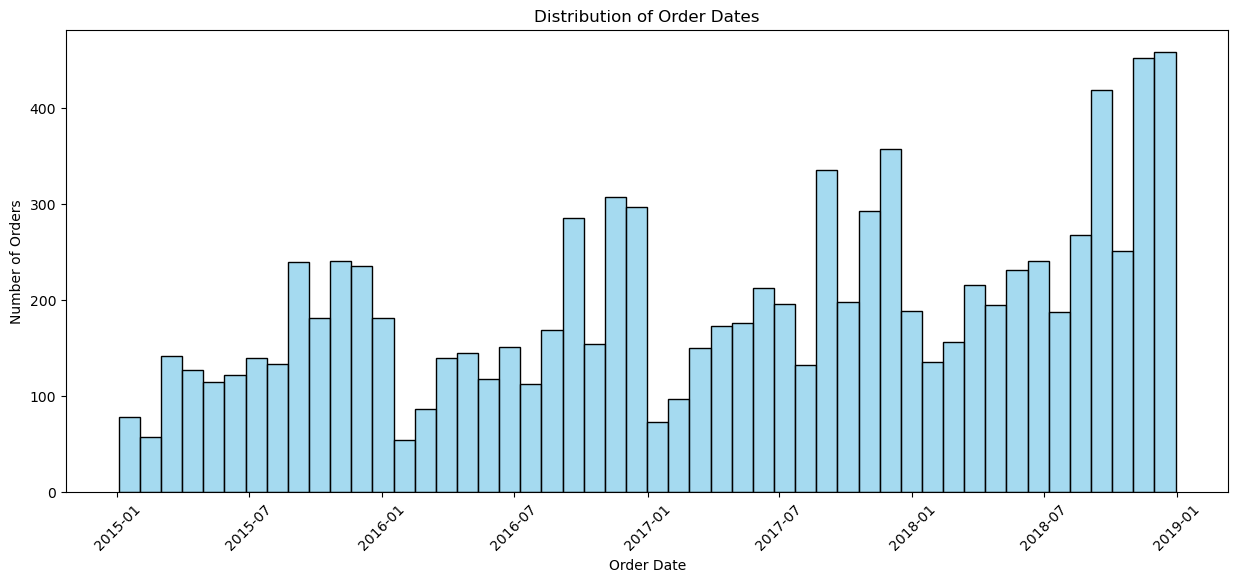

In [68]:
#Distribution of Order Dates:
# Plot the distribution of order dates
plt.figure(figsize=(15, 6))
sns.histplot(df['Order Date'], bins=50, kde=False, color='skyblue')
plt.title('Distribution of Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

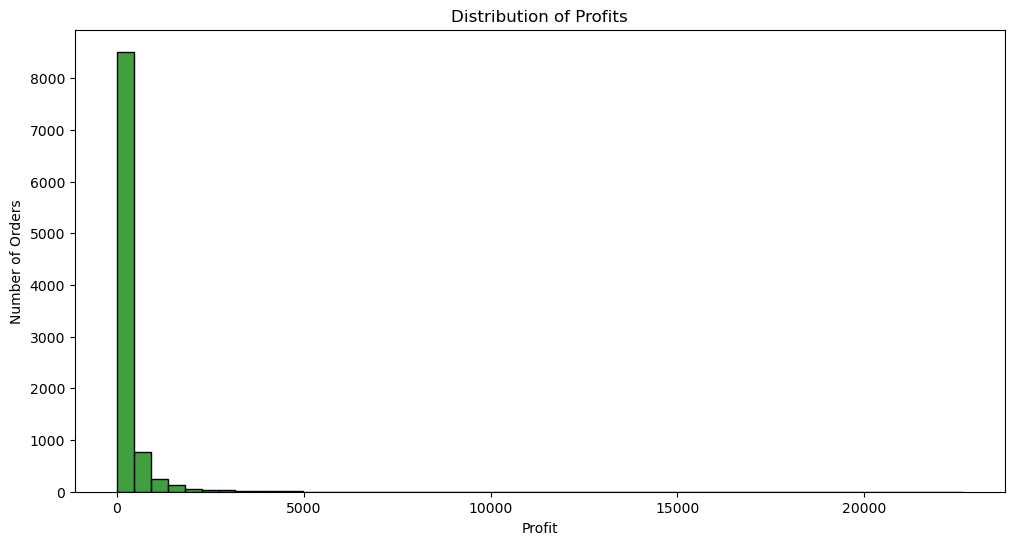

In [69]:
# Calculate Profit based on Sales
df['Profit'] = df['Sales']  # Assuming there is no 'Cost' column

# Distribution of Profits
plt.figure(figsize=(12, 6))
sns.histplot(df['Profit'], bins=50, kde=False, color='green')
plt.title('Distribution of Profits')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.show()


## Linear Regression

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [61]:
# Display the first few rows of the dataframe
print(df.head())

         Order ID                    Order Date                     Ship Date  \
0  CA-2017-152156 1970-01-01 00:00:00.000000778 1970-01-01 00:00:00.020171111   
1  CA-2017-152156 1970-01-01 00:00:00.000000778 1970-01-01 00:00:00.020171111   
2  CA-2017-138688 1970-01-01 00:00:00.000000885 1970-01-01 00:00:00.020170616   
3  US-2016-108966 1970-01-01 00:00:00.000000543 1970-01-01 00:00:00.020161018   
4  US-2016-108966 1970-01-01 00:00:00.000000543 1970-01-01 00:00:00.020161018   

        Ship Mode Customer ID    Customer Name    Segment        Country  \
0    Second Class    CG-12520      Claire Gute   Consumer  United States   
1    Second Class    CG-12520      Claire Gute   Consumer  United States   
2    Second Class    DV-13045  Darrin Van Huff  Corporate  United States   
3  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States   
4  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States   

              City       State  Postal Code Region      

In [42]:
# Assuming your dataset is stored in a DataFrame called 'df'
# Encode categorical variables if needed
le = LabelEncoder()
df['Order Date'] = le.fit_transform(df['Order Date'])

In [43]:
# Choose X and y
X = df[['Order Date']]
y = df['Sales']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Use Polynomial Regression
degree = 2  # You can experiment with different degrees
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())

In [46]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [47]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [107]:
# Evaluate the mode
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1545072348660798


In [109]:
# Evaluate the mode
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1545072348660798


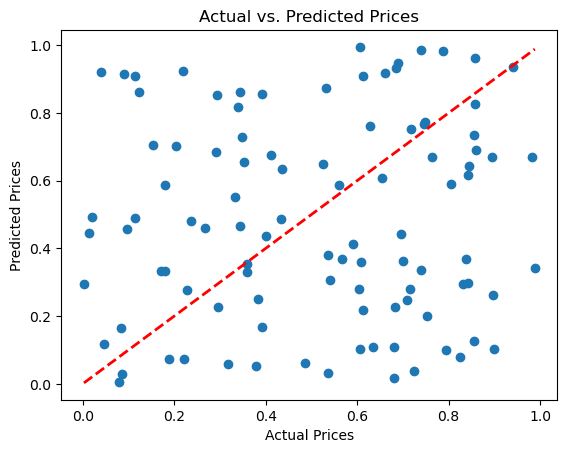

In [94]:
# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)

# Add a line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Add labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()